In [34]:
from data_loader import load_data
from plot_utils import show_transform_plot
from functools import partial
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import ticker

In [2]:
train = load_data()

In [3]:
col_dtypes = train.dtypes
num_feats = col_dtypes[col_dtypes != 'object'].axes[0].tolist()
cat_feats = col_dtypes[col_dtypes == 'object'].axes[0].tolist()

In [12]:
#create variables for convenience
cat = train[cat_feats]
price = train['SalePrice']
print(cat.columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


# All bivariate correlations (boxplots) with SalePrice

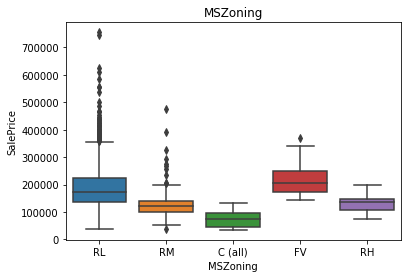

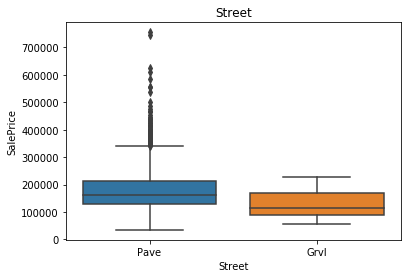

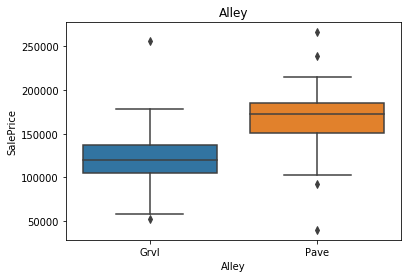

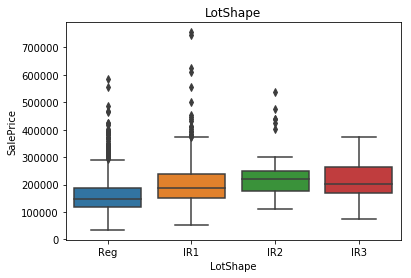

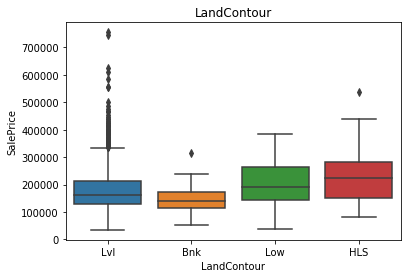

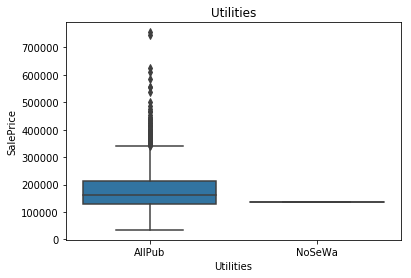

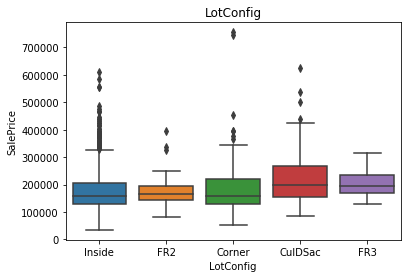

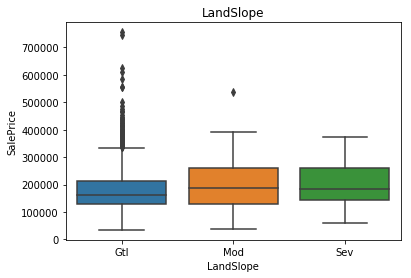

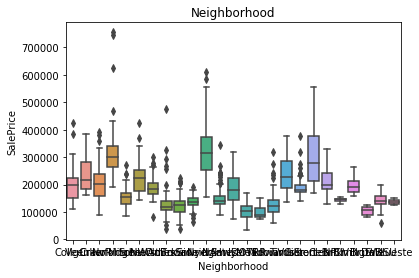

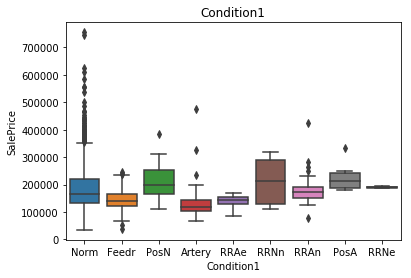

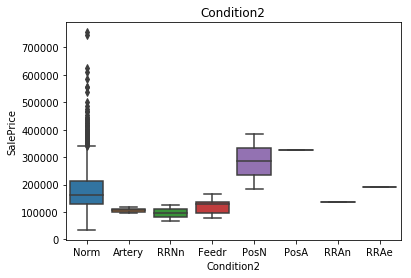

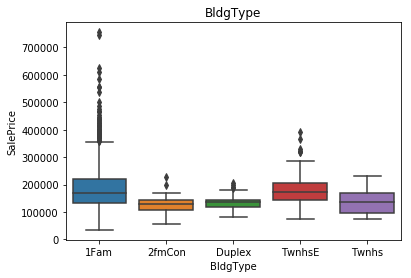

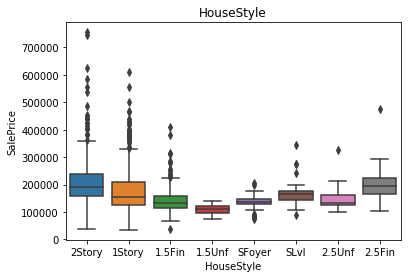

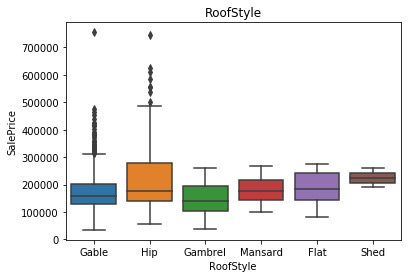

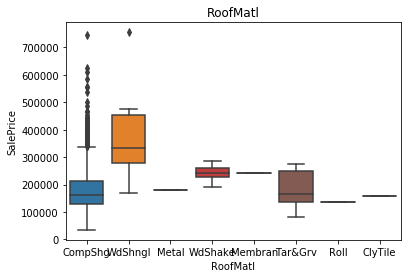

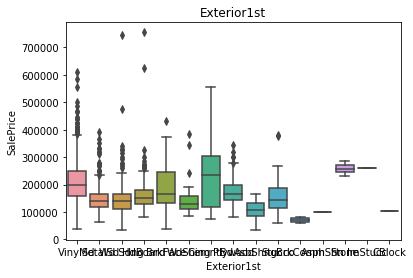

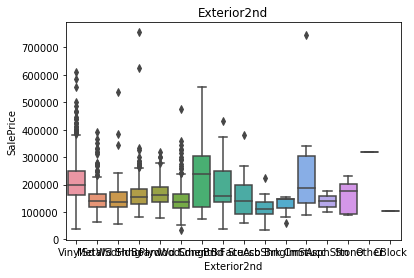

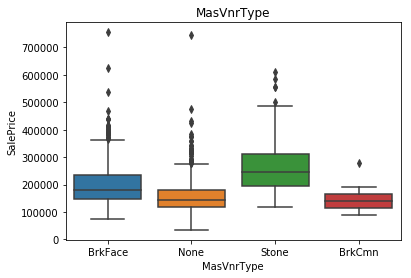

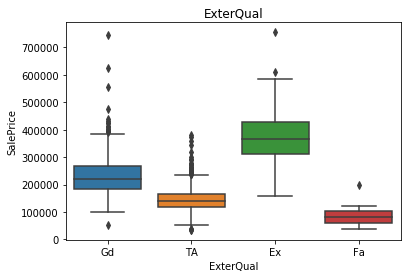

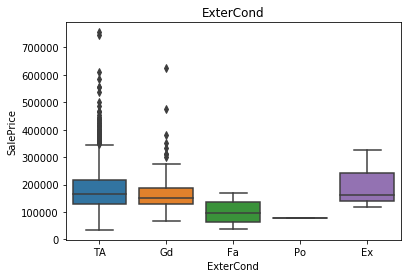

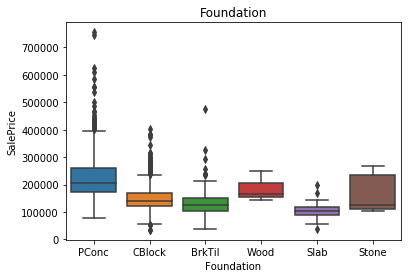

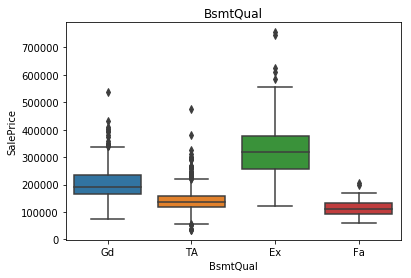

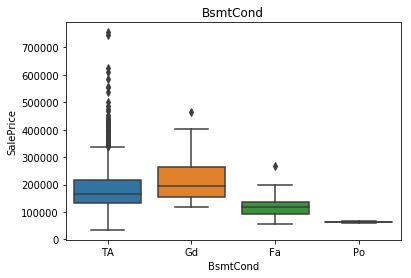

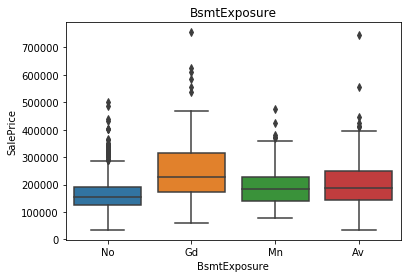

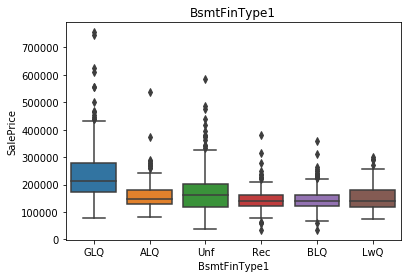

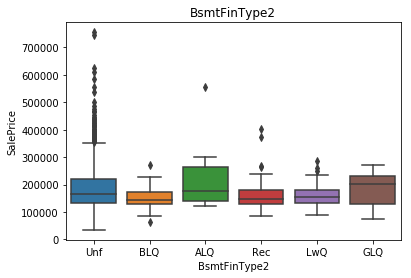

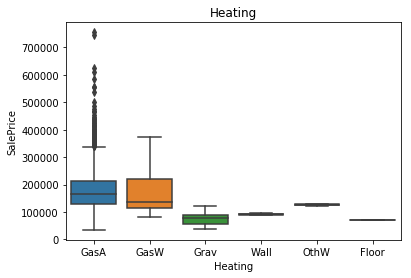

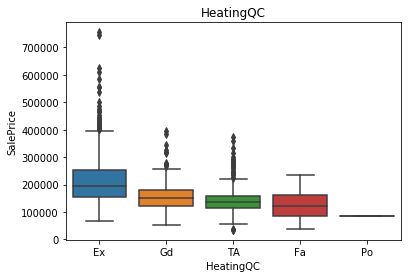

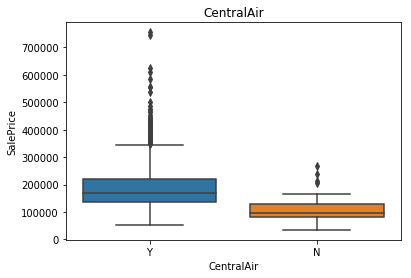

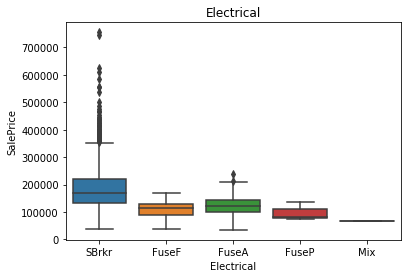

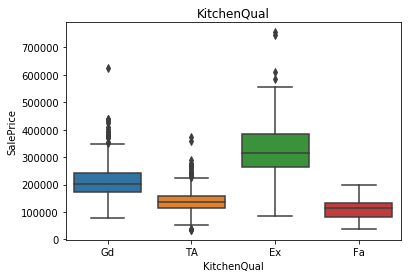

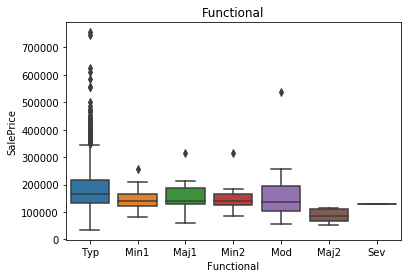

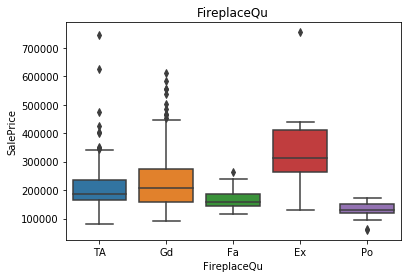

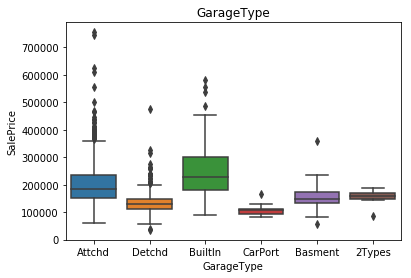

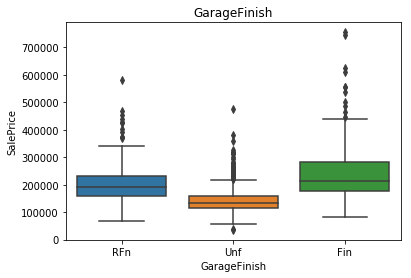

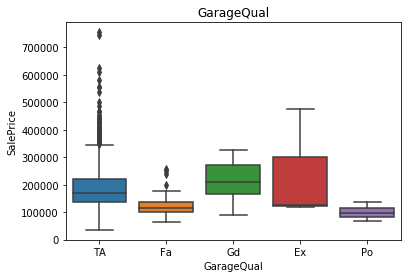

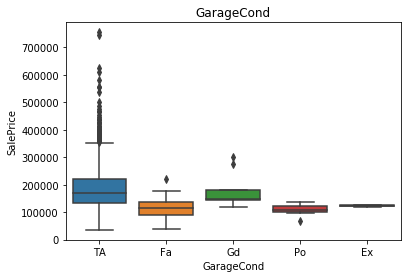

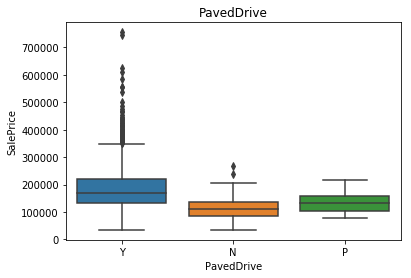

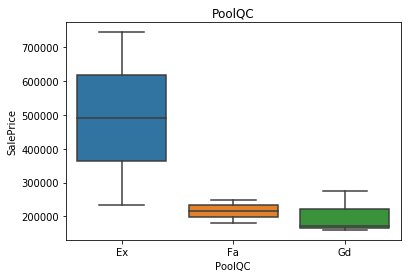

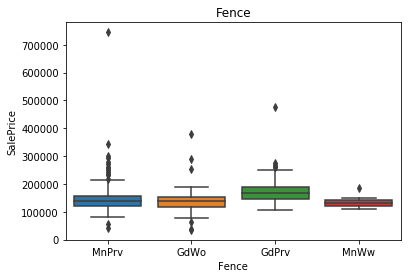

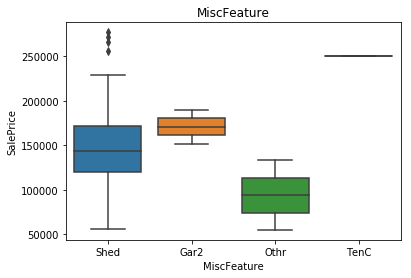

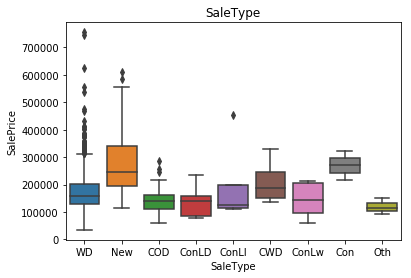

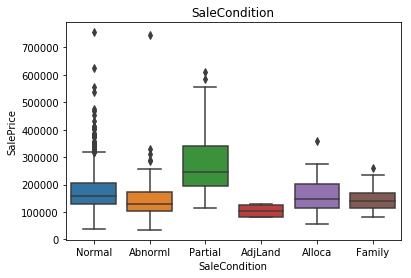

In [28]:
for feat in cat:
    sns.boxplot(feat, "SalePrice", data=train)
    plt.title(feat)
    plt.show()

# Features analysis

## Neighborhod

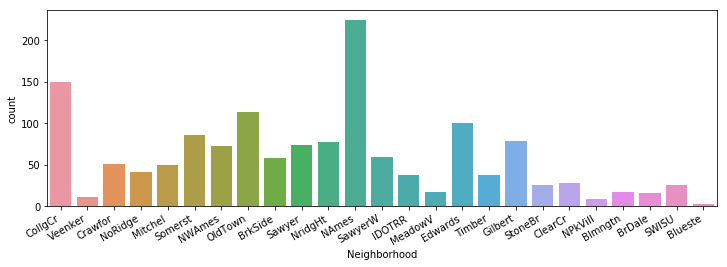

In [60]:
fig, ax = plt.subplots(figsize=(12,4))
sns.countplot(cat['Neighborhood'], ax=ax)
fig.autofmt_xdate()

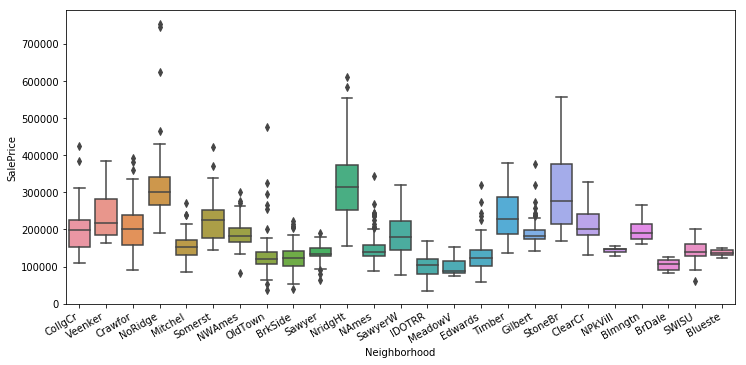

In [77]:
neighborhood_as_cat = cat['Neighborhood'].astype('category')
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(cat['Neighborhood'], price, ax=ax)
fig.autofmt_xdate()

In [136]:
grouped_neigh = cat.groupby('LandSlope')

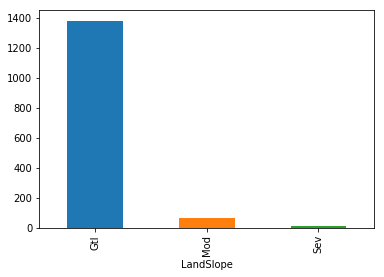

In [132]:
(grouped_neigh[('Neighborhood', 'count')]).plot(kind='bar')#, ('LandContour','count')]]

1. Reduce neighborhood values: for purpose of dimensionality reduction we can group together some similar (with respect to price correlation) neighborhoods into one and create ordinal variable describes neighborhood atractiveness (classify to mode category when hasn't been seen yet)